ほぼ全部GPTかネットのパクリです

In [1]:
import matplotlib.pyplot as plt 
import networkx as nx
import numpy as np 

In [2]:
def visualize(G):
    # 平均経路長
    avg_path_length = nx.average_shortest_path_length(G)
    print("平均経路長:", avg_path_length)
    
    # クラスタ係数
    avg_cluster_coefficient = nx.average_clustering(G)
    print("クラスタ係数:", avg_cluster_coefficient)
    
    # 次数分布
    degree_sequence = [d for n, d in G.degree()]
    degree_counts = np.bincount(degree_sequence)
    degrees = np.arange(len(degree_counts))
    plt.scatter(degrees, degree_counts, color='blue', marker='o')
    plt.xlabel('Degree', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xscale("log")
    plt.yscale("log")
    plt.title('Degree Distribution', fontsize=14)
    plt.show()
        
    nx.draw(G, with_labels=True, font_weight='bold')
    plt.show()
    plt.clf()

#### スモールワールドネットワーク

平均経路長: 4.847070707070707
クラスタ係数: 0.32733333333333337


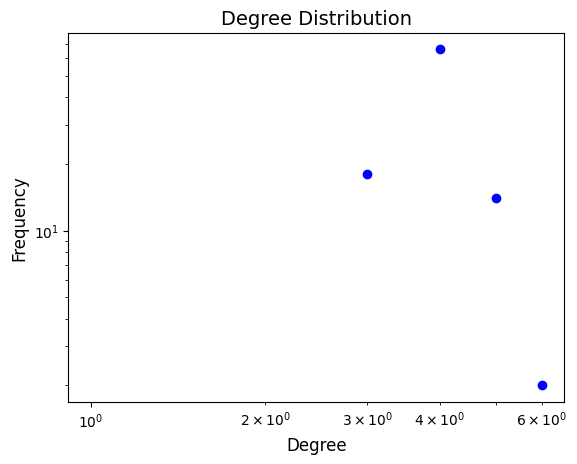

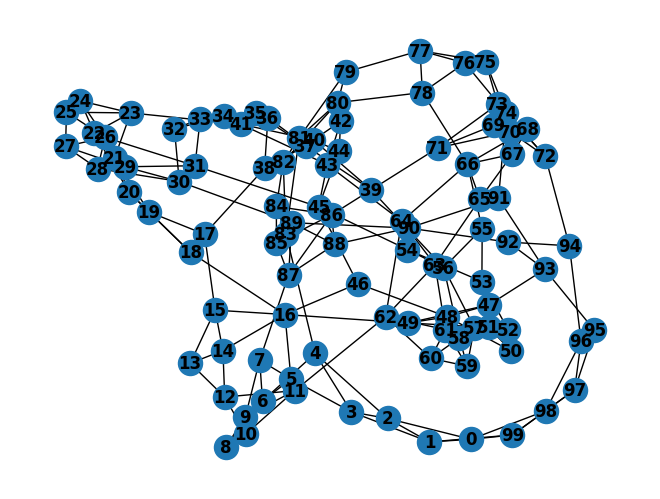

<Figure size 640x480 with 0 Axes>

In [3]:
g = nx.watts_strogatz_graph(n=100, k=4, p=0.1, seed=20231204)
visualize(g)

#### BAネットワーク

平均経路長: 3.0032323232323233
クラスタ係数: 0.11300417168569005


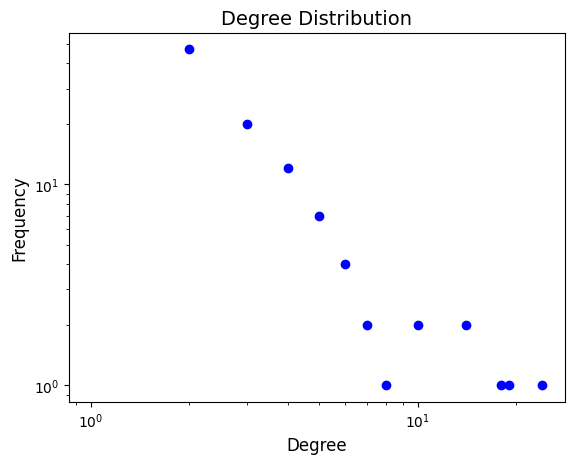

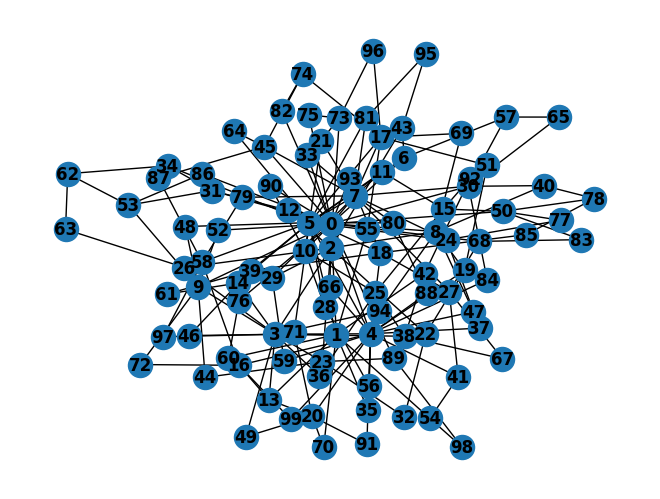

<Figure size 640x480 with 0 Axes>

In [4]:
g = nx.barabasi_albert_graph(n=100, m=2, seed=20231204)
visualize(g)

#### CNNネットワーク

networkxになく、自分で実装したくないので[このサイト](https://linuxtut.com/en/c013a579378bffce2e50/)の実装をパクります

In [5]:
import networkx as nx
import random
import matplotlib.pyplot as plt


class CNN:
    def __init__(self, node_num, u, seed = 0):
        self.graph = nx.Graph()
        self.node_num = node_num
        self.u = u
        random.seed(seed)
        self.make_cnn()
        
    def make_cnn(self):
        self.graph.add_node(0)
        while len(list(self.graph.nodes)) < self.node_num:
            #Add a new node with probability u
            if random.random() < 1 - self.u:
                new_node = len(list(self.graph.nodes))
                self.graph.add_node(new_node)
                #Randomly select nodes that already exist in the network
                node_list = list(self.graph.nodes)
                node_list.remove(new_node)
                selected_node = random.choice(node_list)
                # selected_new to all adjacent nodes of node_Connect the potential edge with node
                neighbor_nodes = self.get_neighbors(selected_node)
                for nn in neighbor_nodes:
                    self.graph.add_edge(nn, new_node, attribute="potential")
                #Connect the real edge
                self.graph.add_edge(selected_node, new_node, attribute="real")
            #Probability 1-Randomly select a potential link with u and convert it to a real edge
            else:
                potential_edge_list = self.get_attribute_edgelist("potential")
                if len(potential_edge_list) > 0:
                    node_a, node_b = random.choice(potential_edge_list)
                    self.graph.edges[node_a, node_b]["attribute"] = "real"
                    

    def get_attribute_edgelist(self, attr):
        '''
The value of the edge is attr(potenntial or real)Returns a list of edges
        '''
        # {(node, node):attribute}Get the dict
        edge_dict = nx.get_edge_attributes(self.graph, "attribute")
        attr_edgelist = []
        for edge, attribute in edge_dict.items():
            if attribute == attr:
                attr_edgelist.append(edge)
        return attr_edgelist
                
    def get_neighbors(self, node):
        '''
node and real_Returns a list of nodes connected by edge
        '''
        edgelist = self.get_attribute_edgelist("real")
        nodelist = []
        for node_a, node_b in edgelist:
            if node_a == node:
                nodelist.append(node_b)
            elif node_b == node:
                nodelist.append(node_a)
        return nodelist
    
    def plot_graph(self):
        plt.figure(figsize=(15, 10), facecolor="w")
        pos = nx.spring_layout(self.graph, k=1.0)
        real_edge_list = self.get_attribute_edgelist("real")
        nx.draw_networkx_nodes(self.graph,
                               pos,
                               node_color="r")
        nx.draw_networkx_edges(self.graph, pos, edgelist=real_edge_list)
        nx.draw_networkx_labels(self.graph, pos, font_size=10)
        
        plt.axis("off")
        plt.show()

平均経路長: 3.0804040404040403
クラスタ係数: 0.7458534514908522


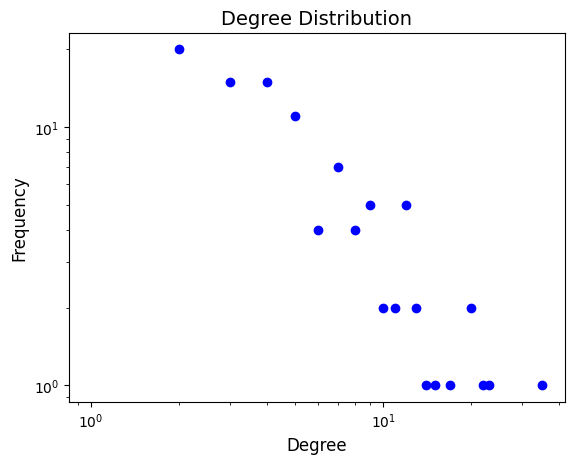

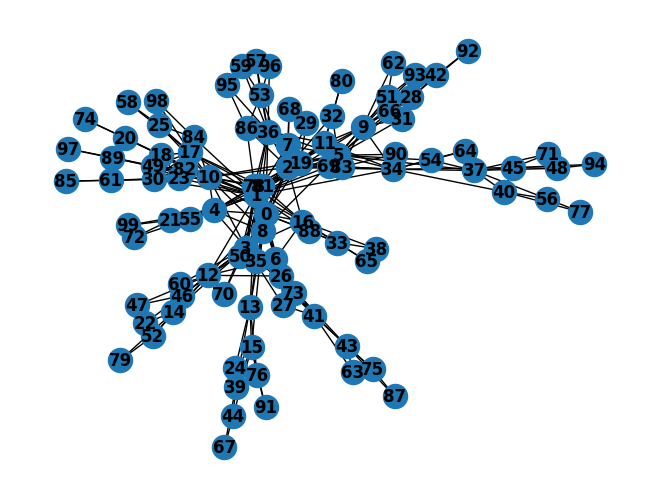

<Figure size 640x480 with 0 Axes>

In [6]:
cnn = CNN(node_num=100, u=0.1)
cnn.make_cnn()
visualize(cnn.graph)